In [1]:
!pip install yfinance

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

## 1. Data Collection

In [3]:
now=datetime.now()
start=datetime(now.year-10, now.month, now.day)
end=now
ticker='AAPL'
df=yf.download(ticker, start, end)
df

C:\Users\Aditya-VIN2083\AppData\Local\Temp\ipykernel_28416\413636362.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download(ticker, start, end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-09-17,25.600729,26.178273,25.555785,25.991753,256450400
2015-09-18,25.495110,25.686128,25.140045,25.216450,297141200
2015-09-21,25.890631,25.926588,25.542307,25.544553,200888000
2015-09-22,25.483875,25.659161,25.286116,25.479380,201384800
2015-09-23,25.690624,25.780515,25.461405,25.535563,143026800
...,...,...,...,...,...
2025-09-09,234.350006,238.779999,233.360001,237.000000,66313900
2025-09-10,226.789993,232.419998,225.949997,232.190002,83440800


In [4]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-09-17,25.600729,26.178273,25.555785,25.991753,256450400
2015-09-18,25.495110,25.686128,25.140045,25.216450,297141200
2015-09-21,25.890631,25.926588,25.542307,25.544553,200888000
2015-09-22,25.483875,25.659161,25.286116,25.479380,201384800
2015-09-23,25.690624,25.780515,25.461405,25.535563,143026800


In [5]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-09-09,234.350006,238.779999,233.360001,237.000000,66313900
2025-09-10,226.789993,232.419998,225.949997,232.190002,83440800
2025-09-11,230.029999,230.449997,226.649994,226.880005,50208600
2025-09-12,234.070007,234.509995,229.020004,229.220001,55824200
2025-09-16,238.149994,241.220001,236.323502,237.179993,61246555


# 2. Data Exploration & Visualization

In [6]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2513.000000,2513.000000,2513.000000,2513.000000,2.513000e+03
mean,107.272722,108.345410,106.087321,107.169685,1.057354e+08
std,69.896460,70.578083,69.129234,69.820730,5.949476e+07
min,20.624048,20.927684,20.425434,20.546434,2.323470e+07
25%,40.371628,40.740992,40.034052,40.437250,6.508660e+07
50%,111.813919,112.876586,109.707240,111.444281,9.186560e+07
75%,168.172333,169.512720,166.929949,167.921393,1.297004e+08
max,258.103729,259.179926,256.718662,257.276679,5.334788e+08


Text(0, 0.5, 'Close Price')

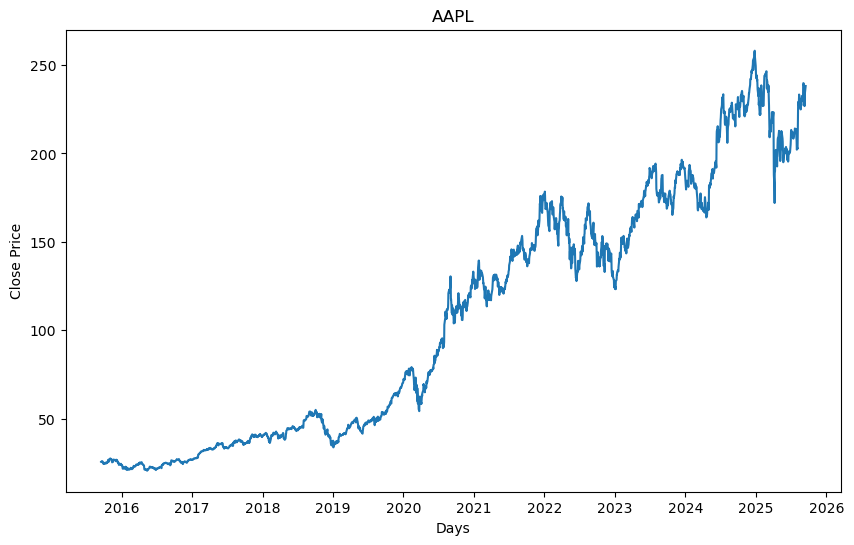

In [7]:
plt.figure(figsize=(10,6))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel("Days")
plt.ylabel("Close Price")

# 3. Feature Engineering

In [8]:
df=df.reset_index()  #Important to reset for better working of rolling function that we are going to do ahead.
df

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-09-17,25.600729,26.178273,25.555785,25.991753,256450400
1,2015-09-18,25.495110,25.686128,25.140045,25.216450,297141200
2,2015-09-21,25.890631,25.926588,25.542307,25.544553,200888000
3,2015-09-22,25.483875,25.659161,25.286116,25.479380,201384800
4,2015-09-23,25.690624,25.780515,25.461405,25.535563,143026800
...,...,...,...,...,...,...
2508,2025-09-09,234.350006,238.779999,233.360001,237.000000,66313900
2509,2025-09-10,226.789993,232.419998,225.949997,232.190002,83440800
2510,2025-09-11,230.029999,230.449997,226.649994,226.880005,50208600


In [9]:
df['MA_100']=df.Close.rolling(100).mean()
df.head()

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-09-17,25.600729,26.178273,25.555785,25.991753,256450400,NaN
1,2015-09-18,25.495110,25.686128,25.140045,25.216450,297141200,NaN
2,2015-09-21,25.890631,25.926588,25.542307,25.544553,200888000,NaN
3,2015-09-22,25.483875,25.659161,25.286116,25.479380,201384800,NaN
4,2015-09-23,25.690624,25.780515,25.461405,25.535563,143026800,NaN


In [10]:
df['MA_200']=df.Close.rolling(200).mean()
df.head(203)

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-09-17,25.600729,26.178273,25.555785,25.991753,256450400,NaN,NaN
1,2015-09-18,25.495110,25.686128,25.140045,25.216450,297141200,NaN,NaN
2,2015-09-21,25.890631,25.926588,25.542307,25.544553,200888000,NaN,NaN
3,2015-09-22,25.483875,25.659161,25.286116,25.479380,201384800,NaN,NaN
4,2015-09-23,25.690624,25.780515,25.461405,25.535563,143026800,NaN,NaN
...,...,...,...,...,...,...,...,...
198,2016-06-30,21.824875,21.863684,21.528094,21.560055,143345600,22.738780,NaN
199,2016-07-01,21.891079,22.023490,21.763235,21.799761,104106000,22.742147,23.750092
200,2016-07-05,21.685617,21.779219,21.564622,21.776935,110820800,22.745093,23.730517


Text(0, 0.5, 'Price')

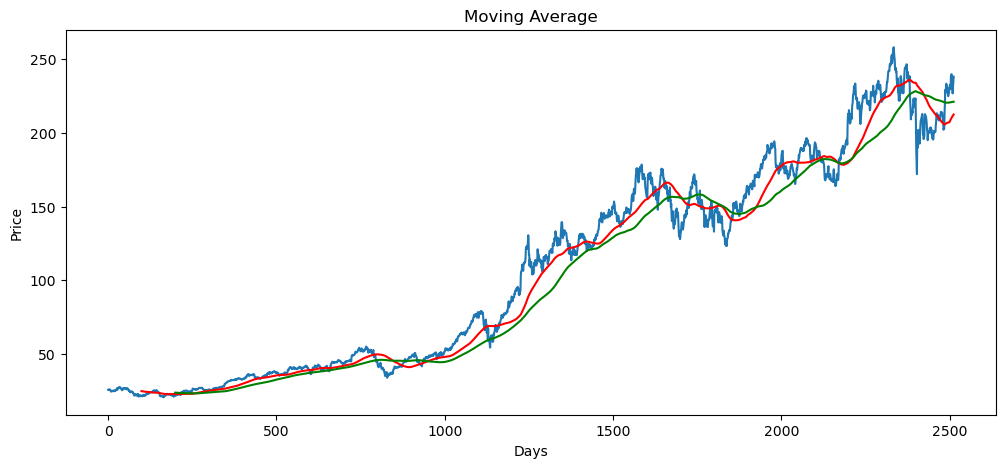

In [11]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r')
plt.plot(df['MA_200'], 'g')
plt.title("Moving Average")
plt.xlabel("Days")
plt.ylabel("Price")

# Calculating % change in each trading session

In [12]:
df['Percentage Change']=df.Close.pct_change()
df[['Close', 'Percentage Change']]

Price,Close,Percentage Change
Ticker,AAPL,
0,25.600729,NaN
1,25.495110,-0.004126
2,25.890631,0.015514
3,25.483875,-0.015711
4,25.690624,0.008113
...,...,...
2508,234.350006,-0.014839
2509,226.789993,-0.032259
2510,230.029999,0.014286


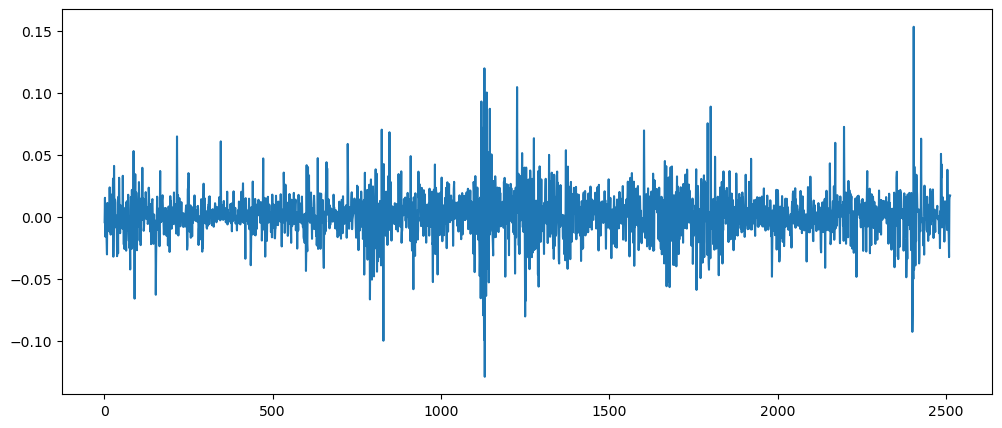

In [13]:
plt.figure(figsize=(12,5))
plt.plot(df['Percentage Change'])

# 4. Data Preprocessing

In [14]:
# Let's split 70% data for training and 30% for testing 

df_training=df.Close[0:int(len(df)*0.7)]
df_testing=df.Close[int(len(df)*0.7):]
df_training

Ticker,AAPL
0,25.600729
1,25.495110
2,25.890631
3,25.483875
4,25.690624
...,...
1754,152.128586
1755,153.536362
1756,152.059708
1757,154.924454


In [15]:
df_testing

Ticker,AAPL
1759,151.449310
1760,152.896469
1761,150.002151
1762,148.358109
1763,152.079346
...,...
2508,234.350006
2509,226.789993
2510,230.029999
2511,234.070007


# Scaling down the data between 0 and 1 bcoz our computers understands 0 and 1 only

MinMaxScaler scales all values into a fixed range (e.g. [0,1]) so that features with large magnitudes don’t dominate training and the model converges(when the loss stops decreasing significantly) faster.

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_array=scaler.fit_transform(df_training)
data_training_array

array([[0.03153409],
       [0.03086485],
       [0.03337102],
       ...,
       [0.83282497],
       [0.85097706],
       [0.8887788 ]], shape=(1759, 1))

# 5. Sequence Creation
We have to do this bcoz LSTM models require data to be in sequential manner

In [18]:
x_train=[]
y_train=[]

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train=np.array(x_train), np.array(y_train)
x_train

array([[[0.03153409],
        [0.03086485],
        [0.03337102],
        ...,
        [0.00450027],
        [0.00592368],
        [0.00589495]],

       [[0.03086485],
        [0.03337102],
        [0.03079366],
        ...,
        [0.00592368],
        [0.00589495],
        [0.00485971]],

       [[0.03337102],
        [0.03079366],
        [0.0321037 ],
        ...,
        [0.00589495],
        [0.00485971],
        [0.00404018]],

       ...,

       [[0.89744045],
        [0.89607216],
        [0.91056462],
        ...,
        [0.84124597],
        [0.83326141],
        [0.84218159]],

       [[0.89607216],
        [0.91056462],
        [0.90950746],
        ...,
        [0.83326141],
        [0.84218159],
        [0.83282497]],

       [[0.91056462],
        [0.90950746],
        [0.90446909],
        ...,
        [0.84218159],
        [0.83282497],
        [0.85097706]]], shape=(1659, 100, 1))

# 6. Model Building 

In [19]:
!pip install tensorflow

In [20]:
import tensorflow as tf

In [21]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [22]:
model = Sequential()

model.add(Input(shape=(100,1)))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

#### Input(shape=(100,1)): 
    - Takes 100 timesteps with 1 feature (closing price)

#### LSTM(units=128, activation='tanh', return_sequences=True): 
    - 128 memory cells learn different temporal patterns
    - tanh activation handles positive/negative price changes
    - return_sequences=True passes full sequence to next layer

#### LSTM(units=64):
    - 64 cells learn higher-level patterns from first LSTM
    - No return_sequences = only outputs final state for prediction

#### Dense(25):
    - 25 neurons combine all LSTM temporal features
    - Reduces complexity (64→25) to prevent overfitting

#### Dense(1):
    - Single output neuron for final stock price prediction
    - No activation = linear output for regression

# 7. Model Training 

In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - loss: 0.0124
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 145ms/step - loss: 5.6821e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 149ms/step - loss: 5.6952e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - loss: 5.0173e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - loss: 4.8137e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 150ms/step - loss: 5.0198e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 152ms/step - loss: 4.6502e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - loss: 4.3916e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 4.2785e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - loss: 4.5703e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 141ms/step - loss: 4.4405e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - loss: 4.2624e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 148ms/step - loss: 4.0402e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 142ms/step - loss: 3.9342e-04
Epoc

#### model.compile(optimizer='adam', loss='mean_squared_error'):
    - optimizer='adam': Smart learning algorithm that adjusts learning rate automatically (good for most cases)
    - loss='mean_squared_error': Measures prediction error by squaring differences (standard for regression/price prediction)

#### model.fit(x_train, y_train, epochs=50):
    - x_train: Input sequences (100 days of prices each)
    - y_train: Target values (next day's actual price)
    - epochs=50: Model sees the entire training data 50 times to learn patterns

#### What happens:
    - Model makes predictions → Calculates error using MSE → Adam optimizer adjusts weights → Repeat 50 times
    - Each epoch, model gets better at predicting stock prices

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [25]:
model.save('Stock_price_prediction.keras')

# 8. Preparing Test Data

In [26]:
past_100_days=df_training.tail(100)
past_100_days

Ticker,AAPL
1659,164.161667
1660,163.366516
1661,158.821472
1662,159.891464
1663,153.923065
...,...
1754,152.128586
1755,153.536362
1756,152.059708
1757,154.924454


In [27]:
df_testing

Ticker,AAPL
1759,151.449310
1760,152.896469
1761,150.002151
1762,148.358109
1763,152.079346
...,...
2508,234.350006
2509,226.789993
2510,230.029999
2511,234.070007


In [28]:
final_df=pd.concat([past_100_days, df_testing], ignore_index=True)
final_df

Ticker,AAPL
0,164.161667
1,163.366516
2,158.821472
3,159.891464
4,153.923065
...,...
849,234.350006
850,226.789993
851,230.029999
852,234.070007


In [29]:
input_data=scaler.fit_transform(final_df)
input_data

array([[3.03216189e-01],
       [2.97318425e-01],
       [2.63607082e-01],
       [2.71543390e-01],
       [2.27274788e-01],
       [2.25599995e-01],
       [2.77077065e-01],
       [2.33463417e-01],
       [2.35720392e-01],
       [2.46787628e-01],
       [2.94406042e-01],
       [2.27056130e-01],
       [2.32452068e-01],
       [1.94388845e-01],
       [2.12253828e-01],
       [1.53846707e-01],
       [1.25116961e-01],
       [1.58294674e-01],
       [1.46846485e-01],
       [1.73826062e-01],
       [1.12429371e-01],
       [8.71270770e-02],
       [8.88770191e-02],
       [1.29127726e-01],
       [1.09075259e-01],
       [1.10242113e-01],
       [1.34013123e-01],
       [1.76742746e-01],
       [1.70909379e-01],
       [1.69961522e-01],
       [1.88191048e-01],
       [1.45679970e-01],
       [1.51221567e-01],
       [1.69961522e-01],
       [1.64492811e-01],
       [1.25700389e-01],
       [8.55227935e-02],
       [4.72410258e-02],
       [5.36574805e-02],
       [7.31268605e-02],


In [30]:
x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [31]:
x_test, y_test=np.array(x_test), np.array(y_test)

# 9. Making Predictions

In [32]:
y_predicted=model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step


In [33]:
y_predicted

array([[0.25223094],
       [0.24498434],
       [0.23493293],
       [0.21974082],
       [0.2043859 ],
       [0.20489909],
       [0.21710484],
       [0.2199374 ],
       [0.21584675],
       [0.20476146],
       [0.19645499],
       [0.19478163],
       [0.19090638],
       [0.16877984],
       [0.13827583],
       [0.12607433],
       [0.13341397],
       [0.14587101],
       [0.15308295],
       [0.14235319],
       [0.12996244],
       [0.11783081],
       [0.1084536 ],
       [0.11432029],
       [0.11257271],
       [0.11820874],
       [0.12779197],
       [0.1356663 ],
       [0.13892125],
       [0.14901818],
       [0.16354932],
       [0.18196176],
       [0.18713461],
       [0.17412776],
       [0.1881753 ],
       [0.20021828],
       [0.2000218 ],
       [0.18117464],
       [0.14796698],
       [0.12154876],
       [0.1080157 ],
       [0.10502404],
       [0.09577198],
       [0.11580522],
       [0.14711747],
       [0.16767119],
       [0.18125907],
       [0.184

In [34]:
y_test

array([2.08926539e-01, 2.19660355e-01, 1.98192722e-01, 1.85998584e-01,
       2.13599615e-01, 2.31270274e-01, 2.08050323e-01, 2.00894483e-01,
       1.84027154e-01, 1.86509578e-01, 1.93738417e-01, 1.79719073e-01,
       1.25976880e-01, 9.47247596e-02, 1.25757996e-01, 1.52409699e-01,
       1.54600126e-01, 1.47517511e-01, 1.08525219e-01, 1.10934983e-01,
       1.00420390e-01, 9.57470871e-02, 1.29700968e-01, 9.60390836e-02,
       1.25465886e-01, 1.35250034e-01, 1.36053704e-01, 1.32621499e-01,
       1.60952862e-01, 1.76871088e-01, 1.97973499e-01, 1.76141097e-01,
       1.42917321e-01, 2.22800336e-01, 2.05275676e-01, 1.85633249e-01,
       1.44596867e-01, 9.96900592e-02, 9.77152344e-02, 1.01664884e-01,
       1.05906757e-01, 7.20430779e-02, 1.59811246e-01, 1.80509954e-01,
       1.70124044e-01, 1.82996791e-01, 1.73854017e-01, 1.87970126e-01,
       1.92139113e-01, 1.68149106e-01, 1.84020703e-01, 1.90530189e-01,
       1.68880682e-01, 1.40429238e-01, 1.18121380e-01, 1.68295330e-01,
      

In [35]:
y_predicted=scaler.inverse_transform(y_predicted.reshape(-1,1)).flatten()
y_test=scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

In [36]:
y_predicted

array([157.2877  , 156.3107  , 154.95555 , 152.90732 , 150.83713 ,
       150.90633 , 152.55193 , 152.93382 , 152.38231 , 150.88776 ,
       149.76787 , 149.54225 , 149.01978 , 146.03664 , 141.92401 ,
       140.27898 , 141.26852 , 142.94801 , 143.92035 , 142.47374 ,
       140.80319 , 139.16756 , 137.9033  , 138.69427 , 138.45865 ,
       139.2185  , 140.51054 , 141.57219 , 142.01103 , 143.37233 ,
       145.33145 , 147.81386 , 148.51128 , 146.75764 , 148.65158 ,
       150.27524 , 150.24875 , 147.70773 , 143.2306  , 139.66884 ,
       137.84427 , 137.44092 , 136.19354 , 138.89447 , 143.11606 ,
       145.88718 , 147.71912 , 148.09238 , 148.50954 , 149.00137 ,
       148.19444 , 148.03079 , 148.47441 , 147.92995 , 145.9166  ,
       143.13086 , 143.39381 , 144.73726 , 145.8007  , 145.95546 ,
       144.4564  , 142.27832 , 141.21063 , 140.7468  , 141.42963 ,
       142.60503 , 142.76535 , 140.28844 , 137.14845 , 134.19693 ,
       132.2762  , 132.30661 , 132.05579 , 131.63562 , 130.719

In [37]:
y_test

array([151.4493103 , 152.89646912, 150.00215149, 148.35810852,
       152.0793457 , 154.46174622, 151.33117676, 150.3664093 ,
       148.09231567, 148.42700195, 149.40161133, 147.51148987,
       140.26583862, 136.05235291, 140.23632812, 143.82957458,
       144.12489319, 143.16999817, 137.91296387, 138.237854  ,
       136.82025146, 136.19018555, 140.76792908, 136.22955322,
       140.19694519, 141.5160675 , 141.62442017, 141.16168213,
       144.98138428, 147.1275177 , 149.97259521, 147.02909851,
       142.54978943, 153.31980896, 150.95709229, 148.30885315,
       142.77622986, 136.7217865 , 136.45553589, 136.98803711,
       137.55993652, 132.99435425, 144.82746887, 147.61811829,
       146.21786499, 147.95339966, 146.7207489 , 148.62391663,
       149.18598938, 145.95159912, 148.09144592, 148.96907043,
       146.05023193, 142.21434021, 139.20674133, 145.97131348,
       146.24743652, 145.75440979, 144.59083557, 140.92253113,
       138.97993469, 140.6661377 , 140.18299866, 142.48

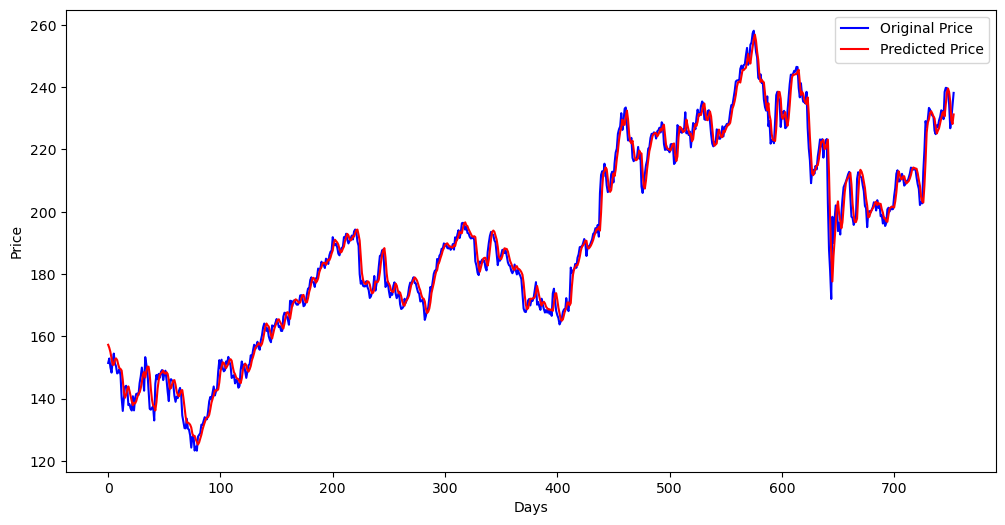

In [40]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label="Original Price")
plt.plot(y_predicted, 'r', label="Predicted Price")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()

(140.0, 220.0)

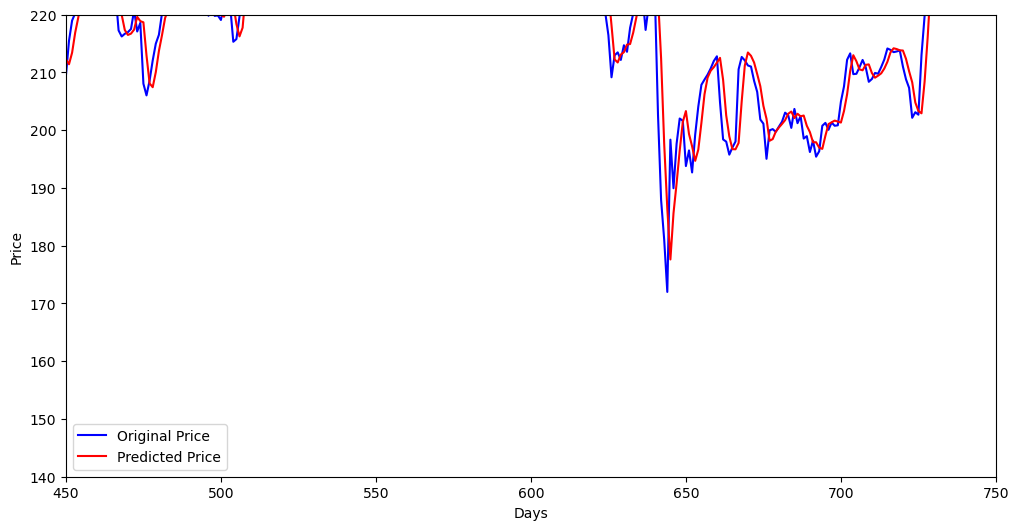

In [39]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label="Original Price")
plt.plot(y_predicted, 'r', label="Predicted Price")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.xlim(450,750)
plt.ylim(140, 220)

# 10. Model Evaluation

In [48]:
# Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
mse=mean_squared_error(y_test, y_predicted)
print(f"Mean Squared Error:{mse}")

Mean Squared Error:14.48044452124712


In [52]:
# Root Mean Squared Error (RMSE)
rmse=np.sqrt(mse)
print(f"Root Mean Squared Error:{rmse}")

Root Mean Squared Error:3.8053179264349413


In [54]:
# R-Squared
r2=r2_score(y_test, y_predicted)
print(f"R-Squared:{r2}")

R-Squared:0.9855212451248452
